# LETS GROW MORE (LGMVIPFEB2022)
## Author:Chandrima Thakur
## Task 4 : Prediction using Decision Tree Algorithm
## Level : INTERMEDIATE
## Language : Python¶
## Dataset-: https://bit.ly/3kXTdox

## IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import sklearn.metrics as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from matplotlib.pyplot import rcParams
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

## READING THE DATA-SET

In [2]:
df = pd.read_csv('iris.csv')
print("Data imported successfully")
df.head()

Data imported successfully


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## LOOKING INTO THE SHAPE

In [3]:
print('The dataset has {} rows and {} columns'.format(df.shape[0],df.shape[1]))
print('\n')

The dataset has 150 rows and 6 columns




## DESCRIPTIVE SUMMARY OF THE DATASET

In [4]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,150.0,NaN,NaN,NaN,75.5,43.445368,1.0,38.25,75.5,112.75,150.0
SepalLengthCm,150.0,NaN,NaN,NaN,5.843333,0.828066,4.3,5.1,5.8,6.4,7.9
SepalWidthCm,150.0,NaN,NaN,NaN,3.054,0.433594,2.0,2.8,3.0,3.3,4.4
PetalLengthCm,150.0,NaN,NaN,NaN,3.758667,1.76442,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,NaN,NaN,NaN,1.198667,0.763161,0.1,0.3,1.3,1.8,2.5
Species,150,3,Iris-setosa,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can say from above that PetalLengthCm and PetalWidthCm are left skewed. The Species iris_setosa has maximum frequency i.e peple prefer iris_setosa plant more

 ## LOOK INTO THE INFO OF THE DATASET

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


We can say from info that there are 4 fields having float data-type and one field with object data type i.e string

## CHECKING FOR MISSING VALUES

In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

We find out there are no missing values

# EDA

## CHECKING FOR OUTLIERS

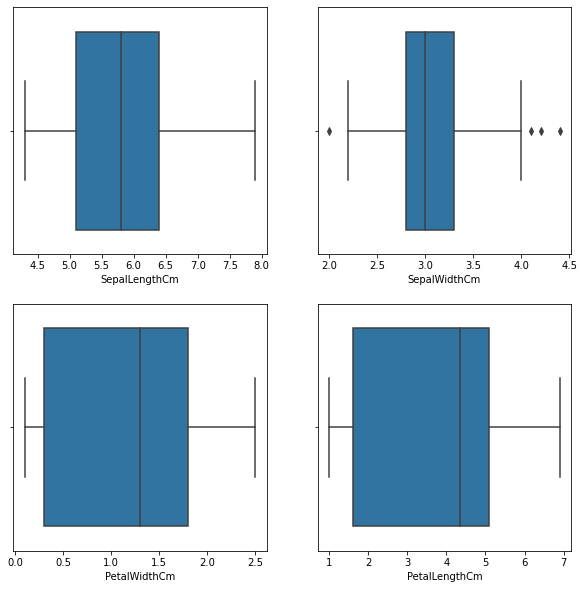

In [7]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(x=df["SepalLengthCm"])

plt.subplot(2,2,2)
sns.boxplot(x=df["SepalWidthCm"])

plt.subplot(2,2,3)
sns.boxplot(x=df["PetalWidthCm"])

plt.subplot(2,2,4)
sns.boxplot(x=df["PetalLengthCm"])
plt.show()

We can see that SepalWidthCm has outliers and other column doesn't have any outliers

## OUTLIER TREATMENT

In [8]:
print(df['SepalWidthCm'].quantile(0.50)) 
print(df['SepalWidthCm'].quantile(0.95)) 

3.0
3.8


In [9]:
df['SepalWidthCm'] = np.where(df['SepalWidthCm'] >3.8,3, df['SepalWidthCm'])

<AxesSubplot:xlabel='SepalWidthCm'>

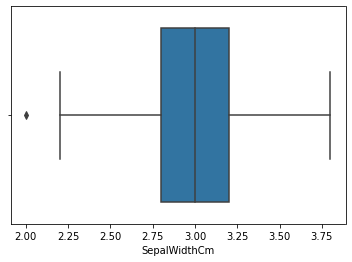

In [10]:
sns.boxplot(x=df["SepalWidthCm"])

Outlier treatment done

##  CORRELATION MATRIX & HEATMAP

In [11]:
 correlation = df.corr()
correlation

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.311556,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.079267,0.871754,0.817954
SepalWidthCm,-0.311556,-0.079267,1.000000,-0.331077,-0.270844
PetalLengthCm,0.882747,0.871754,-0.331077,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.270844,0.962757,1.000000


<AxesSubplot:>

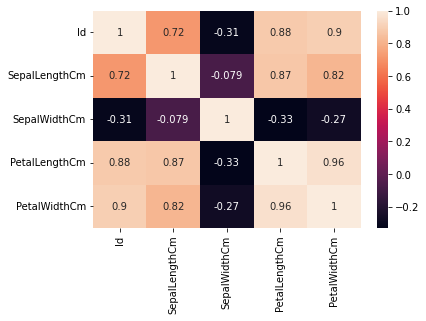

In [12]:
sns.heatmap(correlation,annot=True)

The light colors indicate strong correlation and the dark colors indicate weak correlation

## BASIC VISUALIZATION

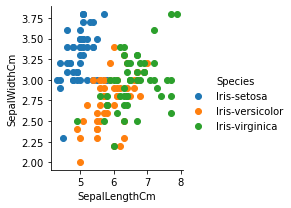

In [13]:
sns.FacetGrid(df,hue='Species').map(plt.scatter,'SepalLengthCm','SepalWidthCm').add_legend()
plt.show()

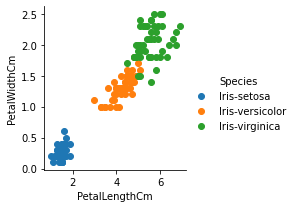

In [14]:
sns.FacetGrid(df,hue='Species').map(plt.scatter,'PetalLengthCm','PetalWidthCm').add_legend()
plt.show()

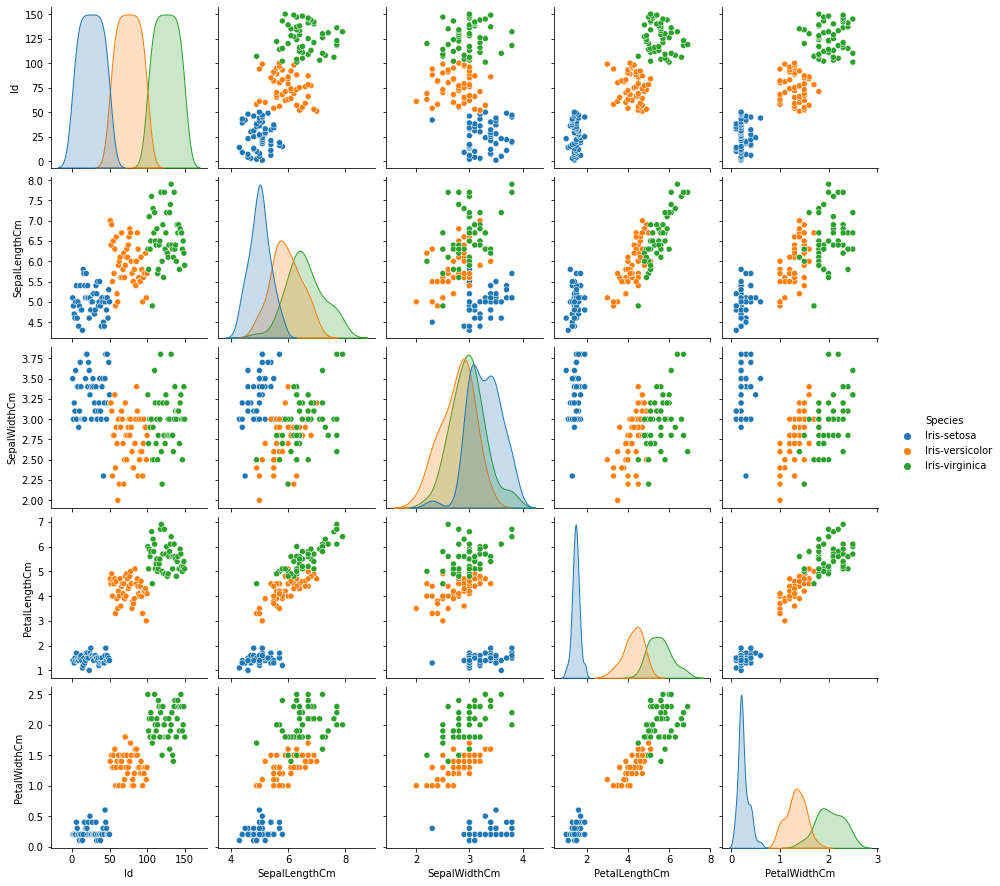

In [15]:
sns.pairplot(data=df,hue='Species');

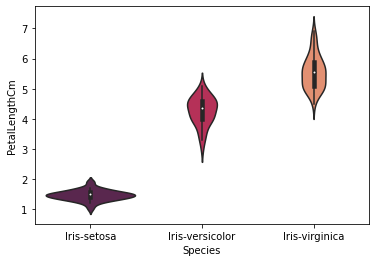

In [16]:
sns.violinplot(data=df, x="Species", y="PetalLengthCm", height=5, palette='rocket')
plt.show()

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

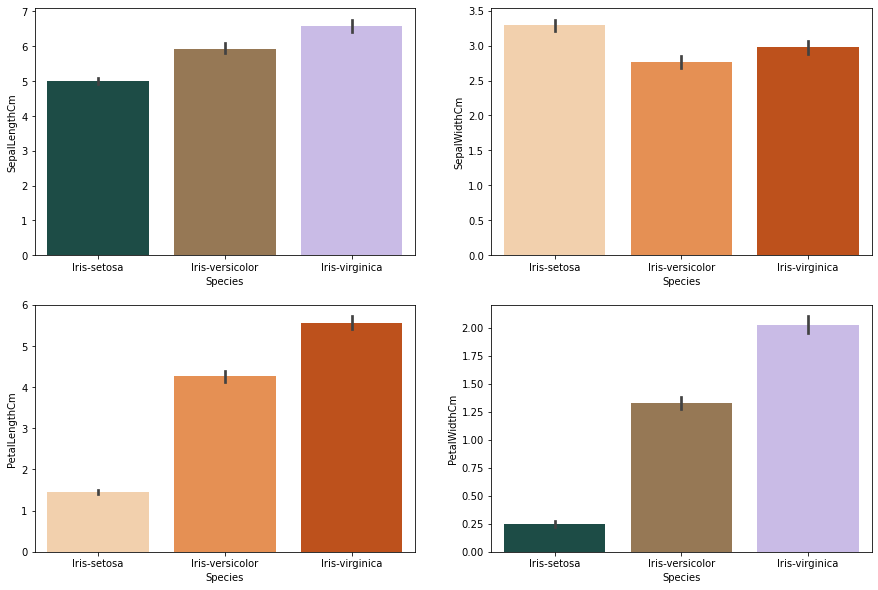

In [17]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(x = 'Species', y = 'SepalLengthCm', data = df, palette="cubehelix")
plt.subplot(2,2,2)
sns.barplot(x = 'Species', y = 'SepalWidthCm', data = df, palette="Oranges")
plt.subplot(2,2,3)
sns.barplot(x = 'Species', y = 'PetalLengthCm', data =df, palette="Oranges")
plt.subplot(2,2,4)
sns.barplot(x = 'Species', y = 'PetalWidthCm', data = df, palette="cubehelix")

## ENCODING THE CATEGORICAL VARIABLES

In [18]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y=LabelEncoder()
s=labelencoder_Y.fit_transform(df.iloc[:,5].values) 

#To Make Changes to the Database Using Encoded Value
df.iloc[:,5]=s

In [19]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


## SPLITTING THE DATA AS DEPENDENT AND INDEPENDENT VARIABLES

In [20]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values

In [21]:
X.shape

(150, 5)

In [22]:
Y.shape

(150,)

## SPLITTING THE DATA INTO TRAINING AND TESTING

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [24]:
print("Training split input",X_train.shape)
print("Testing split input",X_test.shape)

Training split input (120, 5)
Testing split input (30, 5)


## PERFORMING FEATURE SCALING

In [25]:
from sklearn.preprocessing import StandardScaler
std_sc= StandardScaler()
X_train=std_sc.fit_transform(X_train)
X_test=std_sc.fit_transform(X_test)

## BUILDING DECISION TREE ALGORITHM

In [26]:
dec_tree= DecisionTreeClassifier(criterion= "entropy", random_state=0)
dec_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [27]:
y_pred=dec_tree.predict(X_test)

## CHECKING ACCURACY

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9

## VISUALIZING THE TREE

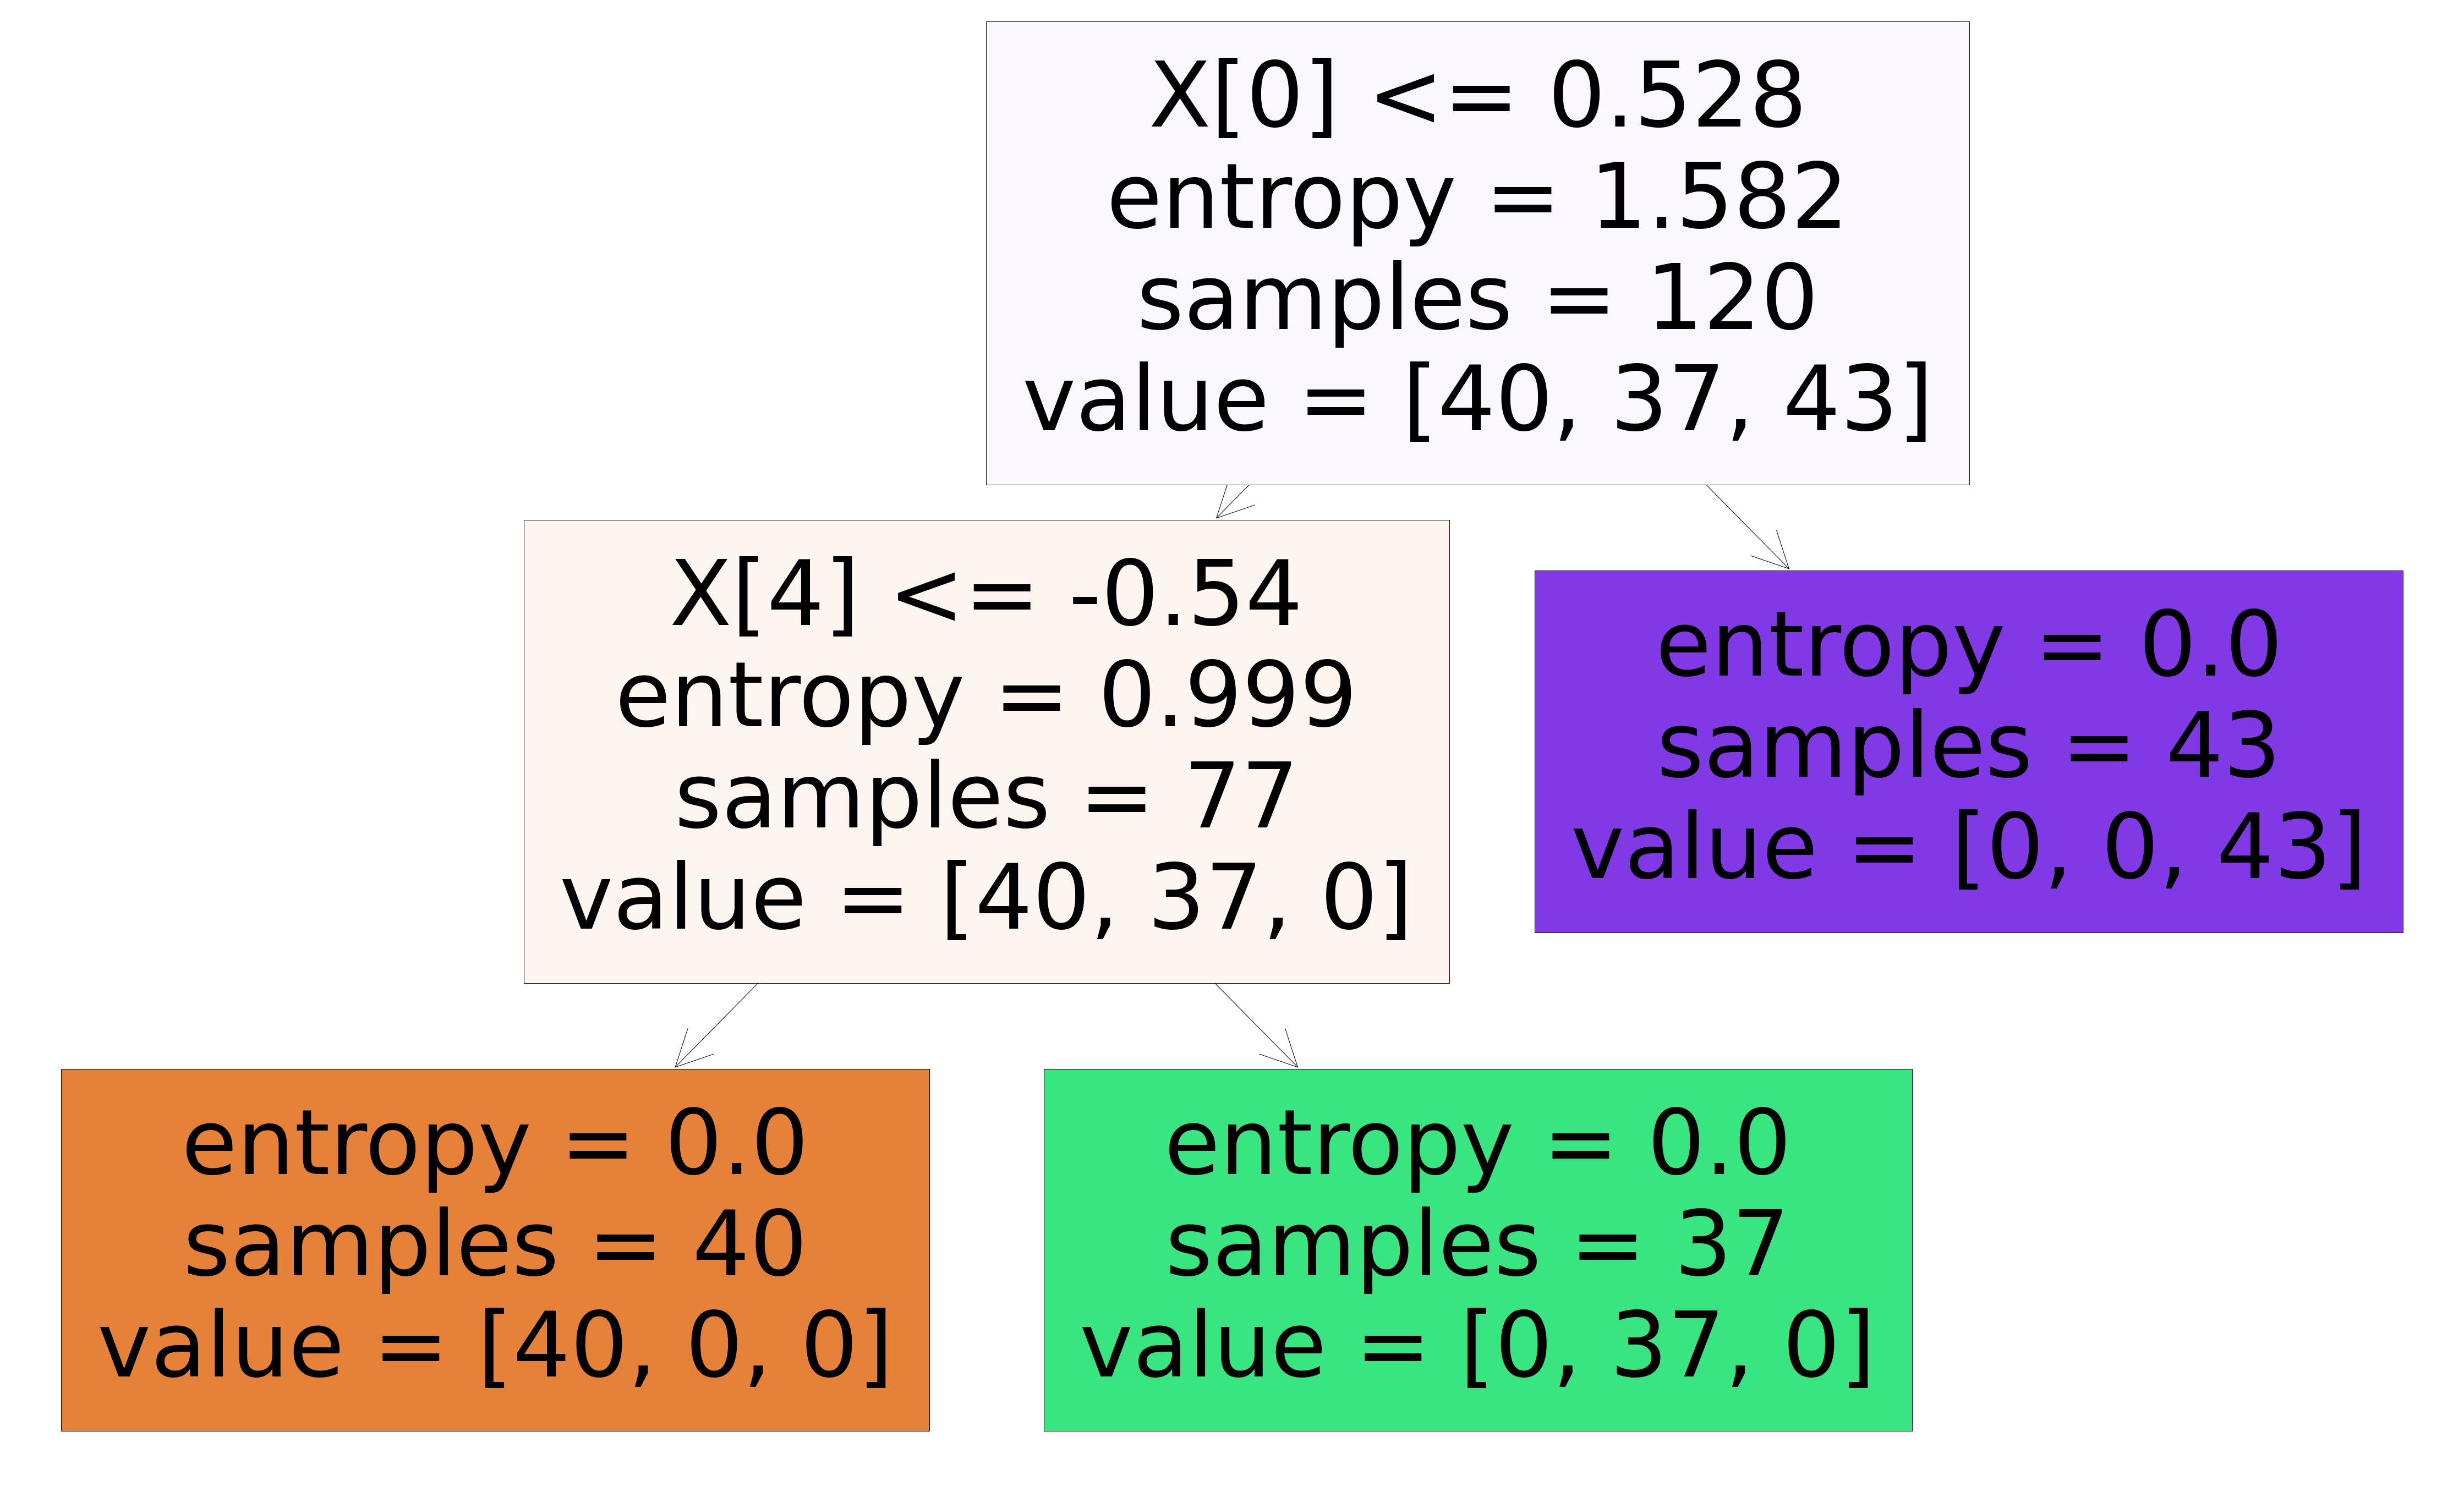

In [29]:
from sklearn.tree import plot_tree
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=80,50
plot_tree(dec_tree,filled=True)
plt.show()